1. Import Libraries

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

2. Import files

In [2]:
#Import path and csv files
path= r'/Users/owner/Documents/05_2023_Instacart_Basket_Analysis'

In [5]:
#import orders_products_merged.pkl
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_grouped_aggregated.pkl'))

In [6]:
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,orders_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,prices,Price_Label,Busiest Days,busiest_period_of_day,max_value,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,9.0,Mid-range Product,Regularly busy days,Average Orders,10,New Customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,9.0,Mid-range Product,Least busy days,Average Orders,10,New Customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,9.0,Mid-range Product,Least busy days,Most Orders,10,New Customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,9.0,Mid-range Product,Least busy days,Average Orders,10,New Customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,9.0,Mid-range Product,Least busy days,Most Orders,10,New Customer,6.367797,Low spender,20.5,Non-frequent customer


In [7]:
ords_prods_merge.shape

(32404859, 22)

<Axes: >

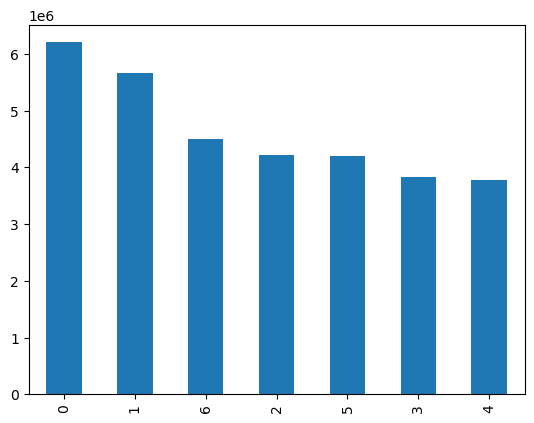

In [9]:
#Create bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

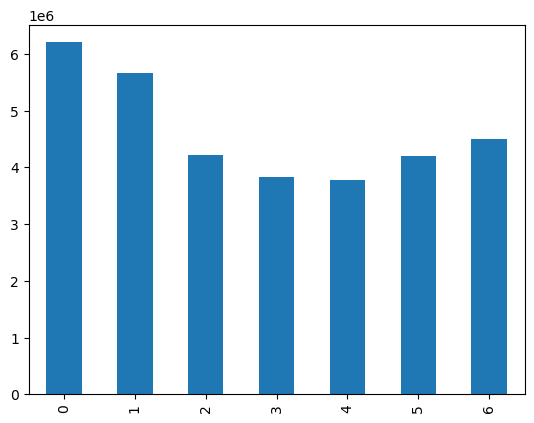

In [10]:
#Sort bar chart in order of index
bar= ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [11]:
#Sort data in order of index: 
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

<Axes: >

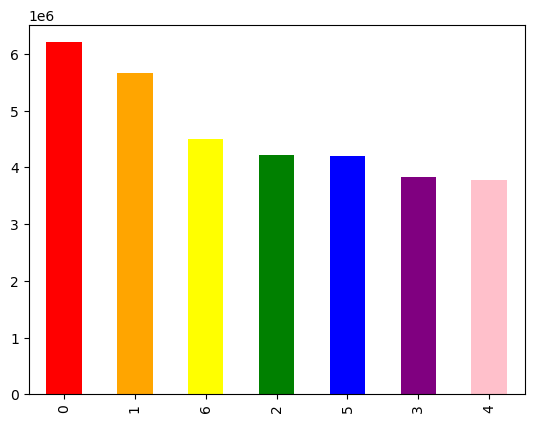

In [13]:
#Add color to chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink'])

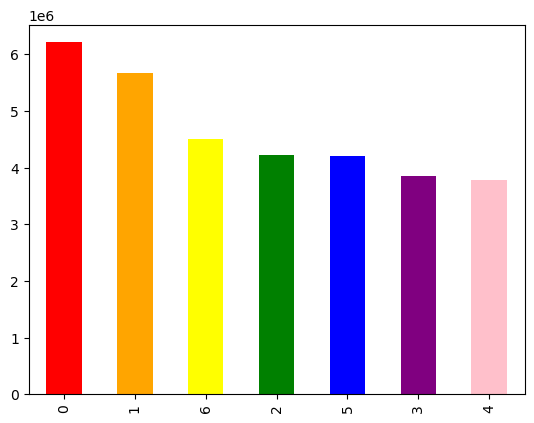

In [21]:
#Export bar graph
bar = ords_prods_merge['order_day_of_week'].value_counts().plot.bar(color =['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink'])

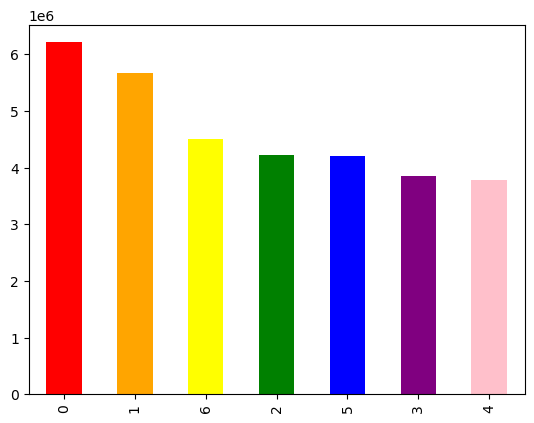

In [22]:
bar.figure

In [23]:
#Export bar outside of python: 
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

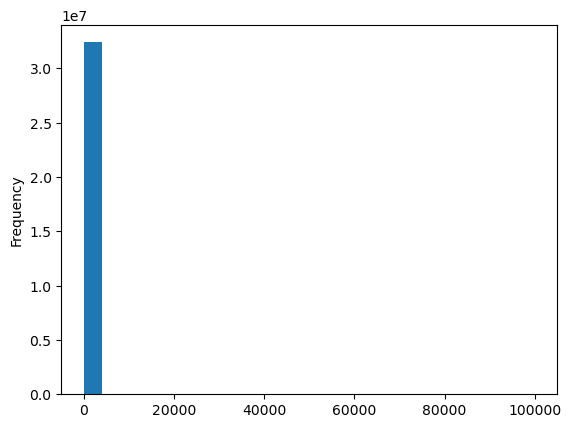

In [14]:
#Create histogram
ords_prods_merge['prices'].plot.hist(bins=25)

In [15]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [16]:
ords_prods_merge['prices'].mean()

11.980225638383454

In [17]:
ords_prods_merge['prices'].median()

7.4

In [18]:
ords_prods_merge['prices'].max()

99999.0

In [19]:
##Somethings wrong with the histogram!! Mean and median are 12 and 7 but max is 99999?? 

<Axes: xlabel='prices', ylabel='prices'>

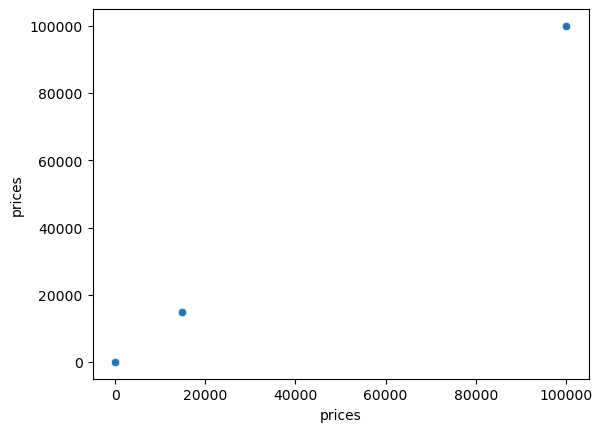

In [20]:
#Create scatterplot
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

In [21]:
pd.set_option('display.max_columns', 500)

In [22]:
ords_prods_merge.loc[ords_prods_merge['prices']>100]

,order_id,user_id,order_number,orders_day_of_week,orders_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,Price_Label,Busiest Days,busiest_period_of_day,max_value,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range Product,Regularly busy days,Most Orders,40,Regular Customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range Product,Regularly busy days,Most Orders,40,Regular Customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range Product,Regularly busy days,Average Orders,4,New Customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range Product,Busiest days,Average Orders,4,New Customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range Product,Busiest days,Average Orders,16,Regular Customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,84,16,99999.0,High-range Product,Busiest days,Average Orders,39,Regular Customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,84,16,99999.0,High-range Product,Busiest days,Most Orders,39,Regular Customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,84,16,99999.0,High-range Product,Least busy days,Most Orders,15,Regular Customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,84,16,99999.0,High-range Product,Least busy days,Average Orders,12,Regular Customer,1178.381871,High spender,12.0,Regular customer


In [23]:
#mark values greater than 100 as missing since they don't make sense
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [24]:
#Check if worked
ords_prods_merge['prices'].max()

25.0

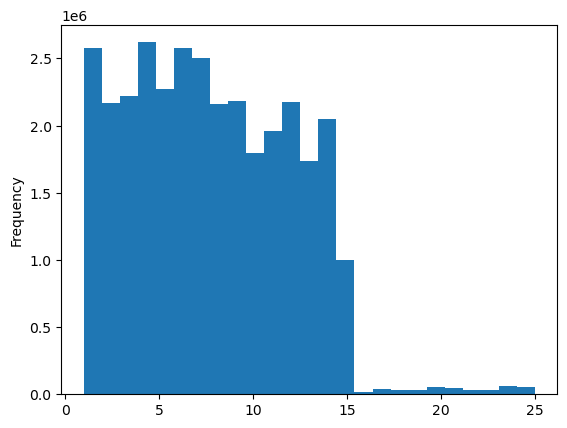

In [25]:
#Create and save histogram on python
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

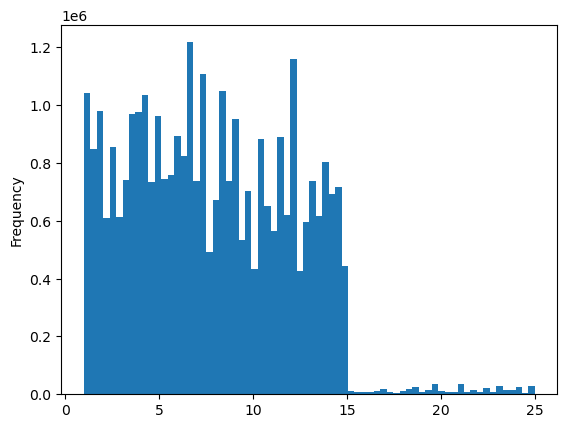

In [26]:
#histogram with thinner columns
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [41]:
#Export histogram outside python
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [28]:
ords_prods_merge.isnull().sum()

order_id                        0
user_id                         0
order_number                    0
orders_day_of_week              0
orders_hour_of_day              0
days_since_prior_order    2076096
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
prices                       5127
Price_Label                     0
Busiest Days                    0
busiest_period_of_day           0
max_value                       0
loyalty_flag                    0
mean_price                      0
spending_flag                   0
median_days                     5
frequency_flag                  5
dtype: int64

# Line Graph
using sample data

Creating sample of data.. the explanation for input#43 
1. Set the seed for the random number generator.
2. Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.
3. Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
4. Store the results of the test in a new list, dev, in the form of boolean values (True and False).

In [43]:
#Create sample using 70/30 ratio
np.random.seed(4) 
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [44]:
dev

array([False,  True, False, ..., False,  True,  True])

In [45]:
#Split dataframe into two samples. 70% in the big sample and 30% in the small sample
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [46]:
#check length of dataframe
len(ords_prods_merge)

32434212

In [47]:
#Check length of sample. Should add up to same total 
len(big) + len(small)

32434212

In [48]:
#set dataframe to use smaller sample for this example
df_2 = small[['order_day_of_week','prices']]

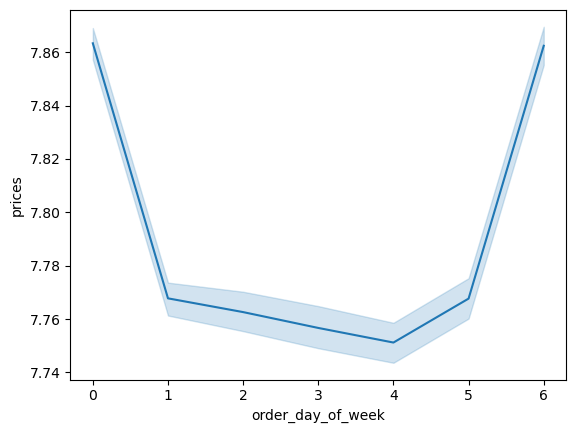

In [49]:
#Create line chart
line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')

In [ ]:
#export updated data
